# Mersenne Twister
Investigar e implementar en Python un generador aleatorio de tipo Mersenne Twister para generar una distribución uniforme U nif (0, 1).  

Igual que en el ejercicio anterior, muestre estadísticos, histogramas y elabore una prueba de hipótesis para contrastar la 
muestra generada contra la muestra teórica, para determinar el buen funcionamiento del generador pseudo aleatorio. Use como tamaño de muestra un valor adecuado de N

In [ ]:
"""
Implementación del algoritmo Mersenne Twister (MT19937)

Parámetros según el estándar MT19937:
- w: word size (32 bits)
- n: degree of recurrence (624)
- m: middle word (397)
- r: separation point of one word (31)
- a: coefficients of the rational normal form twist matrix
- u, d, s, b, t, c, l: tempering bitmasks and shifts
"""

class MersenneTwister:
    def __init__(self, seed=5489):
        # Parámetros MT19937
        self.w = 32
        self.n = 624
        self.m = 397
        self.r = 31
        self.a = 0x9908B0DF
        self.u = 11
        self.d = 0xFFFFFFFF
        self.s = 7
        self.b = 0x9D2C5680
        self.t = 15
        self.c = 0xEFC60000
        self.l = 18
        self.f = 1812433253
        
        self.MT = [0] * self.n
        self.index = self.n + 1
        self.lower_mask = (1 << self.r) - 1
        self.upper_mask = ((1 << self.w) - 1) & ~self.lower_mask
        
        self.seed_mt(seed)
    
    def seed_mt(self, seed):
        """Inicializa el generador con una semilla"""
        self.index = self.n
        self.MT[0] = seed
        for i in range(1, self.n):
            temp = self.f * (self.MT[i-1] ^ (self.MT[i-1] >> (self.w-2))) + i
            self.MT[i] = temp & ((1 << self.w) - 1)
    
    def extract_number(self):
        """Extrae un número pseudoaleatorio"""
        if self.index >= self.n:
            if self.index > self.n:
                raise Exception("Generator was never seeded")
            self.twist()
        
        y = self.MT[self.index]
        y = y ^ ((y >> self.u) & self.d)
        y = y ^ ((y << self.s) & self.b)
        y = y ^ ((y << self.t) & self.c)
        y = y ^ (y >> self.l)
        
        self.index += 1
        return y & ((1 << self.w) - 1)
    
    def twist(self):
        """Genera los siguientes n números del array MT"""
        for i in range(self.n):
            x = (self.MT[i] & self.upper_mask) + (self.MT[(i+1) % self.n] & self.lower_mask)
            xA = x >> 1
            if x % 2 != 0:
                xA = xA ^ self.a
            self.MT[i] = self.MT[(i + self.m) % self.n] ^ xA
        self.index = 0
    
    def random(self):
        """Genera un número float en [0, 1)"""
        return self.extract_number() / (2**32)

mt = MersenneTwister(seed=23)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kstest

N = 10000

muestra_mt_custom = [mt.random() for _ in range(N)]
muestra_mt_custom = np.array(muestra_mt_custom)

print("=== IMPLEMENTACIÓN PROPIA MERSENNE TWISTER ===")
print(f"Tamaño de la muestra: {N}")
print(f"Semilla utilizada: 23")
print(f"Primeros 10 valores generados:")
for i in range(10):
    print(f"  {muestra_mt_custom[i]:.8f}")

print(f"\nEstadísticos:")
print(f"  Mínimo: {muestra_mt_custom.min():.6f}")
print(f"  Máximo: {muestra_mt_custom.max():.6f}")
print(f"  Media: {muestra_mt_custom.mean():.6f}")

C:\Users\irvin\AppData\Local\Temp\ipykernel_28276\2854197500.py:4: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  import scipy.stats as stats


=== IMPLEMENTACIÓN PROPIA MERSENNE TWISTER ===
Tamaño de la muestra: 10000
Semilla utilizada: 23
Primeros 10 valores generados:
  0.36824173
  0.85929616
  0.37409178
  0.72975803
  0.12950698
  0.51273452
  0.52422197
  0.68926705
  0.36182262
  0.85529814

Estadísticos rápidos:
  Mínimo: 0.000249
  Máximo: 0.999966
  Media: 0.500833


In [ ]:
print("=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(f"Media: {muestra_mt_custom.mean():.6f}")
print(f"Desviación estándar: {muestra_mt_custom.std():.6f}")
print(f"Mínimo: {muestra_mt_custom.min():.6f}")
print(f"Máximo: {muestra_mt_custom.max():.6f}")
print(f"Sesgo (skewness): {stats.skew(muestra_mt_custom):.6f}")
print(f"Curtosis: {stats.kurtosis(muestra_mt_custom):.6f}")

print("\n=== COMPARACIÓN CON TEÓRICA Unif(0,1) ===")
print("Teórico - Media: 0.5")
print("Teórico - Desviación estándar: 0.288675")
print("Teórico - Mínimo: 0.0")
print("Teórico - Máximo: 1.0")

=== ESTADÍSTICOS DESCRIPTIVOS ===
Media: 0.500833
Desviación estándar: 0.288974
Mínimo: 0.000249
Máximo: 0.999966
Sesgo (skewness): 0.000793
Curtosis: -1.204430

=== COMPARACIÓN CON TEÓRICA Unif(0,1) ===
Teórico - Media: 0.5
Teórico - Desviación estándar: 0.288675
Teórico - Mínimo: 0.0
Teórico - Máximo: 1.0


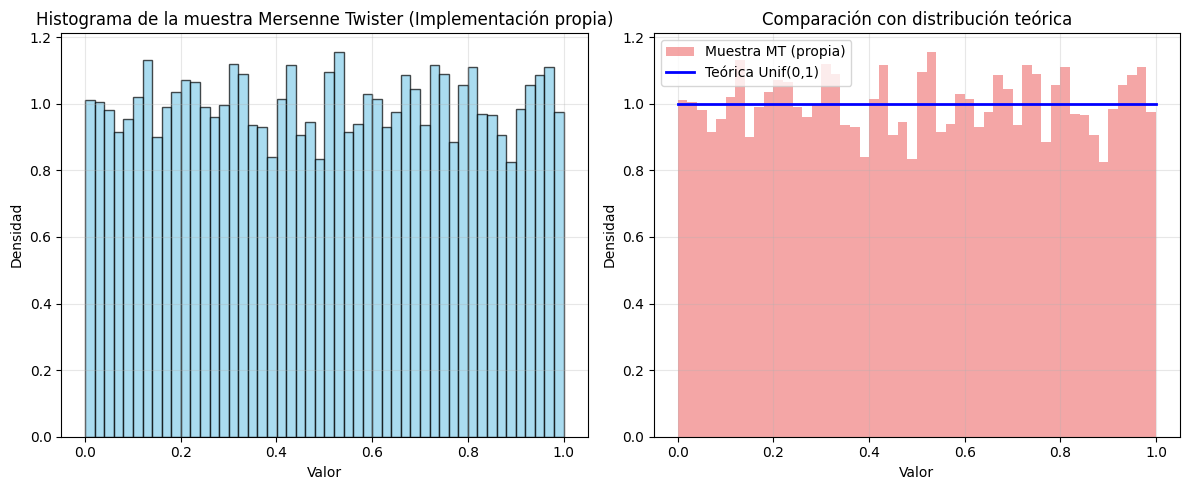

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(muestra_mt_custom, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histograma de la muestra Mersenne Twister (Implementación propia)')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
x_teorico = np.linspace(0, 1, 1000)
y_teorico = np.ones_like(x_teorico)

plt.hist(muestra_mt_custom, bins=50, density=True, alpha=0.7, color='lightcoral', label='Muestra MT (propia)')
plt.plot(x_teorico, y_teorico, 'b-', linewidth=2, label='Teórica Unif(0,1)')
plt.title('Comparación con distribución teórica')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("=== PRUEBA DE KOLMOGOROV-SMIRNOV ===")
ks_statistic, ks_pvalue = kstest(muestra_mt_custom, 'uniform', args=(0, 1))
print(f"Estadístico KS: {ks_statistic:.6f}")
print(f"P-value: {ks_pvalue:.6f}")
print(f"Nivel de significancia α: 0.05")

if ks_pvalue > 0.05:
    print("Resultado: No se rechaza H0 - La muestra sigue distribución Uniform(0,1)")
else:
    print("Resultado: Se rechaza H0 - La muestra NO sigue distribución Uniform(0,1)")

# Prueba de Chi-cuadrado
print("\n=== PRUEBA CHI-CUADRADO ===")
frec_obs, bins = np.histogram(muestra_mt_custom, bins=20)
frec_esp = len(muestra_mt_custom) / 20

chi2_statistic, chi2_pvalue = stats.chisquare(frec_obs, frec_esp)
print(f"Estadístico Chi-cuadrado: {chi2_statistic:.6f}")
print(f"P-value: {chi2_pvalue:.6f}")

if chi2_pvalue > 0.05:
    print("Resultado: No se rechaza H0 - La muestra sigue distribución Uniform(0,1)")
else:
    print("Resultado: Se rechaza H0 - La muestra NO sigue distribución Uniform(0,1)")

=== PRUEBA DE KOLMOGOROV-SMIRNOV ===
Estadístico KS: 0.005792
P-value: 0.888533
Nivel de significancia α: 0.05
Resultado: No se rechaza H0 - La muestra sigue distribución Uniform(0,1)

=== PRUEBA CHI-CUADRADO ===
Estadístico Chi-cuadrado: 34.716000
P-value: 0.015108
Resultado: Se rechaza H0 - La muestra NO sigue distribución Uniform(0,1)


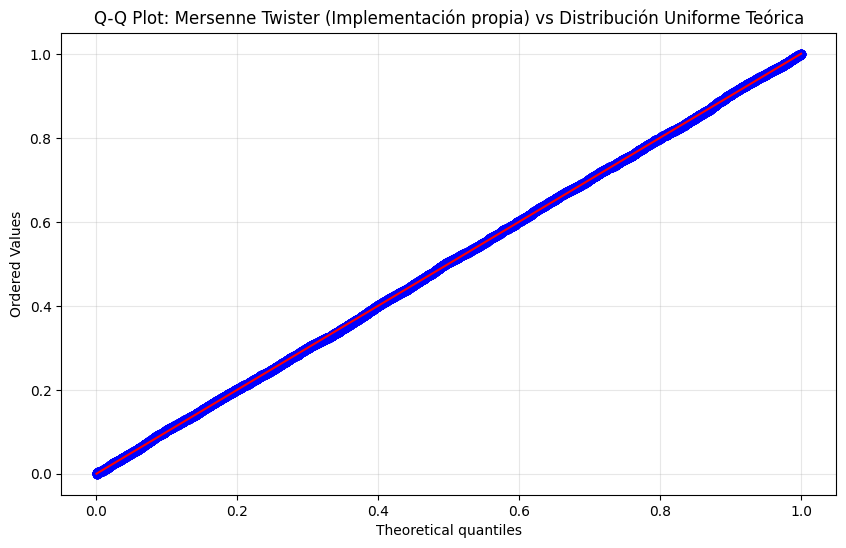

=== ANÁLISIS DE INDEPENDENCIA ===
Autocorrelación lag-1: -0.008970
Test de Runs - Estadístico: -0.489671, P-value: 0.624366
Resultado Runs: No se rechaza H0 - La secuencia es aleatoria


In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(muestra_mt_custom, dist="uniform", plot=plt)
plt.title('Q-Q Plot: Mersenne Twister (Implementación propia) vs Distribución Uniforme Teórica')
plt.grid(alpha=0.3)
plt.show()

# Análisis de correlación serial
print("=== ANÁLISIS DE INDEPENDENCIA ===")
corr_lag1 = np.corrcoef(muestra_mt_custom[:-1], muestra_mt_custom[1:])[0,1]
print(f"Autocorrelación lag-1: {corr_lag1:.6f}")

# Test de aleatoriedad de runs
from statsmodels.sandbox.stats.runs import runstest_1samp
runs_stat, runs_pvalue = runstest_1samp(muestra_mt_custom > 0.5, correction=False)
print(f"Test de Runs - Estadístico: {runs_stat:.6f}, P-value: {runs_pvalue:.6f}")

if runs_pvalue > 0.05:
    print("Resultado Runs: No se rechaza H0 - La secuencia es aleatoria")
else:
    print("Resultado Runs: Se rechaza H0 - La secuencia NO es aleatoria")